# Olist Store Analysis

In [1]:
# Import library needed

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import warnings
import seaborn as sns
from datetime import date, timedelta

# Ignore warnings generated by libraries
warnings.filterwarnings("ignore")

# Default seaborn plot colors palette
sns.set_palette('muted')

In [2]:
# Connect database

con = sqlite3.connect("olist.db")
cur = con.cursor()

In [3]:
# Execute connection and get all table's names

cur.execute("SELECT name FROM sqlite_master WHERE type='table';")

print(cur.fetchall())

[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


In [4]:
# Convert each tables into pandas dataframes

df_order_customer = pd.read_sql("SELECT * FROM olist_order_customer_dataset", con)
df_order = pd.read_sql("SELECT * FROM olist_order_dataset", con)
df_order_reviews = pd.read_sql("SELECT * FROM olist_order_reviews_dataset", con)
df_order_payments = pd.read_sql("SELECT * FROM olist_order_payments_dataset", con)
df_order_items = pd.read_sql("SELECT * FROM olist_order_items_dataset", con)
df_products = pd.read_sql("SELECT * FROM olist_products_dataset", con)
df_sellers = pd.read_sql("SELECT * FROM olist_sellers_dataset", con)
df_geolocation = pd.read_sql("SELECT * FROM olist_geolocation_dataset", con)
df_translations = pd.read_sql("SELECT * FROM product_category_name_translation", con)

# Data Cleaning and Manipulation

**Olist tables connections.**

![Datasets](https://raw.githubusercontent.com/ShiranikuNakonbae/OlistStoreAnalysis/main/assets/links.png)

In [5]:
# Merge needed dataframes into a single one

olist = df_order.merge(df_order_items, on='order_id', how='left')
olist = olist.merge(df_order_payments, on='order_id', how='outer', validate='m:m')
olist = olist.merge(df_order_reviews, on='order_id', how='outer')
olist = olist.merge(df_products, on='product_id', how='outer')
olist = olist.merge(df_order_customer, on='customer_id', how='outer')
olist = olist.merge(df_sellers, on='seller_id', how='outer')

olist.shape

(119143, 46)

In [6]:
# Check all columns name

olist.columns

Index(['index_x', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'index_y', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'index_x', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'index_y', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'index_x',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'index_y',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'index', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
   

## Drop unnecessary columns

In [7]:
# Drop unnecessary columns

olist = olist.drop(columns=['index_x', 'index_y', 'index', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp',
                             'product_name_lenght', 'product_description_lenght', 'product_photos_qty'])

## Duplicate Identifications

In [8]:
# Duplicate identifications

olist[olist.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state


**There is no duplicated data. This analysis will continue to next step.**

## Null identifications

In [9]:
olist.isnull().sum().sort_values(ascending=False)/len(olist)*100

order_delivered_customer_date    2.871339
product_category_name            2.133571
order_delivered_carrier_date     1.750837
review_id                        0.836810
review_score                     0.836810
product_weight_g                 0.715946
product_length_cm                0.715946
product_width_cm                 0.715946
product_height_cm                0.715946
price                            0.699160
freight_value                    0.699160
seller_state                     0.699160
shipping_limit_date              0.699160
seller_id                        0.699160
order_item_id                    0.699160
seller_zip_code_prefix           0.699160
seller_city                      0.699160
product_id                       0.699160
order_approved_at                0.148561
payment_installments             0.002518
payment_value                    0.002518
payment_type                     0.002518
payment_sequential               0.002518
customer_id                      0

In [10]:
# Create a list containing null values

columns_with_null_values = ['order_delivered_customer_date', 'product_category_name', 'order_delivered_carrier_date', 'review_id', 'review_score',
                            'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'price', 'freight_value',
                            'seller_state', 'shipping_limit_date', 'seller_id', 'order_item_id', 'seller_zip_code_prefix', 'seller_city', 'product_id',
                            'order_approved_at', 'payment_installments', 'payment_value','payment_sequential', 'payment_type']

# Drop the rows that contain null values

olist = olist.dropna(subset=columns_with_null_values)
olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119135,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,2.0,710e8b076db06c8e5343a9e23f0e3d83,...,30.0,20.0,20.0,0b39f417a3c099ff0497346258e8d752,39810,carai,MG,88490.0,paulo lopes,SC
119138,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,1.0,31ec3a565e06de4bdf9d2a511b822b4d,...,30.0,28.0,28.0,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,13660.0,porto ferreira,SP
119140,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,1.0,1d187e8e7a30417fda31e85679d96f0f,...,80.0,8.0,30.0,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,fortaleza,CE,13478.0,americana,SP
119141,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,1.0,6e1c2008dea1929b9b6c27fa01381e90,...,41.0,21.0,41.0,e55e436481078787e32349cee9febf5e,39803,teofilo otoni,MG,8320.0,sao paulo,SP


In [11]:
# Recheck null vaules again

olist.isnull().sum().sort_values(ascending=False)/len(olist)*100

order_id                         0.0
customer_id                      0.0
seller_city                      0.0
seller_zip_code_prefix           0.0
customer_state                   0.0
customer_city                    0.0
customer_zip_code_prefix         0.0
customer_unique_id               0.0
product_width_cm                 0.0
product_height_cm                0.0
product_length_cm                0.0
product_weight_g                 0.0
product_category_name            0.0
review_score                     0.0
review_id                        0.0
payment_value                    0.0
payment_installments             0.0
payment_type                     0.0
payment_sequential               0.0
freight_value                    0.0
price                            0.0
shipping_limit_date              0.0
seller_id                        0.0
product_id                       0.0
order_item_id                    0.0
order_estimated_delivery_date    0.0
order_delivered_customer_date    0.0
o

**Since Olist is Brazilian Store, translation is needed to its product categories from Portuguese to English.**

In [12]:
# Translate product catagories from Portuguese to English
# Create translation list

products_in_english = df_translations['product_category_name_english']
products_in_portuguese = df_translations['product_category_name']

translation = dict(zip(products_in_portuguese, products_in_english))

# Replace product categories name with translation
olist['product_category_name'] = olist['product_category_name'].replace(translation)
olist['product_category_name'].unique()

array(['housewares', 'baby', 'cool_stuff', 'sports_leisure', 'toys',
       'furniture_decor', 'perfumery', 'health_beauty', 'pet_shop',
       'music', 'computers', 'construction_tools_construction',
       'signaling_and_security', 'auto', 'watches_gifts', 'audio',
       'electronics', 'computers_accessories', 'telephony',
       'consoles_games', 'stationery', 'party_supplies',
       'fashion_male_clothing', 'fashio_female_clothing', 'food',
       'costruction_tools_tools', 'fashion_bags_accessories',
       'garden_tools', 'office_furniture', 'furniture_living_room',
       'market_place', 'bed_bath_table', 'home_confort', 'art',
       'home_construction', 'air_conditioning',
       'agro_industry_and_commerce', 'fixed_telephony',
       'musical_instruments', 'luggage_accessories', 'fashion_sport',
       'home_appliances', 'small_appliances_home_oven_and_coffee',
       'small_appliances', 'construction_tools_lights',
       'kitchen_dining_laundry_garden_furniture',
       '

**The dataset is now clean and ready for further analysis.**

# Analysis

## City with The Largest Number of Customer and Seller 

In [13]:
# Count total customer by city

olist['customer_city'].value_counts()

sao paulo              17872
rio de janeiro          7786
belo horizonte          3141
brasilia                2382
curitiba                1767
                       ...  
pombos                     1
quatituba                  1
aguas frias                1
bom jardim de goias        1
canto do buriti            1
Name: customer_city, Length: 4071, dtype: int64

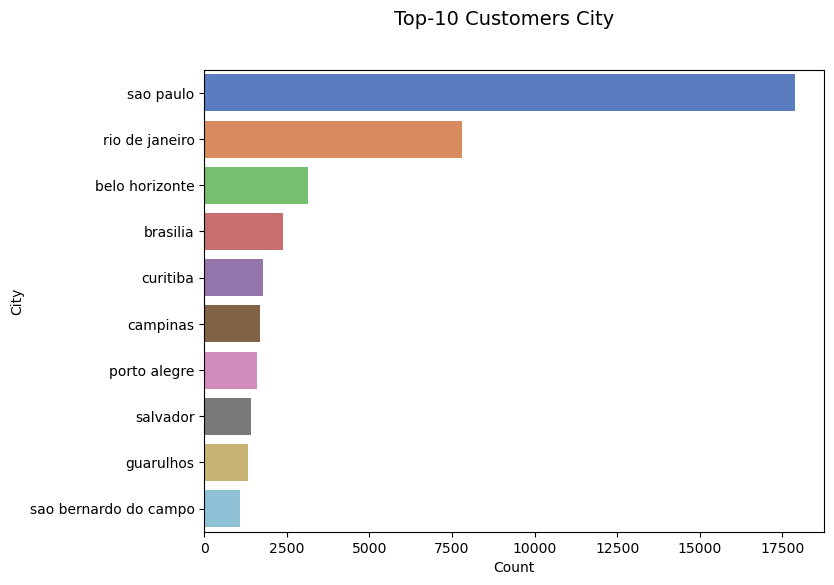

In [14]:
# Plot Top-10 most customers city

plt.figure(figsize=(8,6))
idx = olist['customer_city'].value_counts()[:10].index
sns.countplot(y=olist['customer_city'], order=idx)
plt.xlabel('Count')
plt.ylabel('City')
plt.suptitle('Top-10 Customers City', fontsize=14)
plt.show()

In [15]:
# Count total seller by city

olist['seller_city'].value_counts()

sao paulo                    28212
ibitinga                      8097
curitiba                      3057
santo andre                   3054
sao jose do rio preto         2633
                             ...  
santo antonio da patrulha        1
palotina                         1
belford roxo                     1
maua/sao paulo                   1
uniao da vitoria                 1
Name: seller_city, Length: 587, dtype: int64

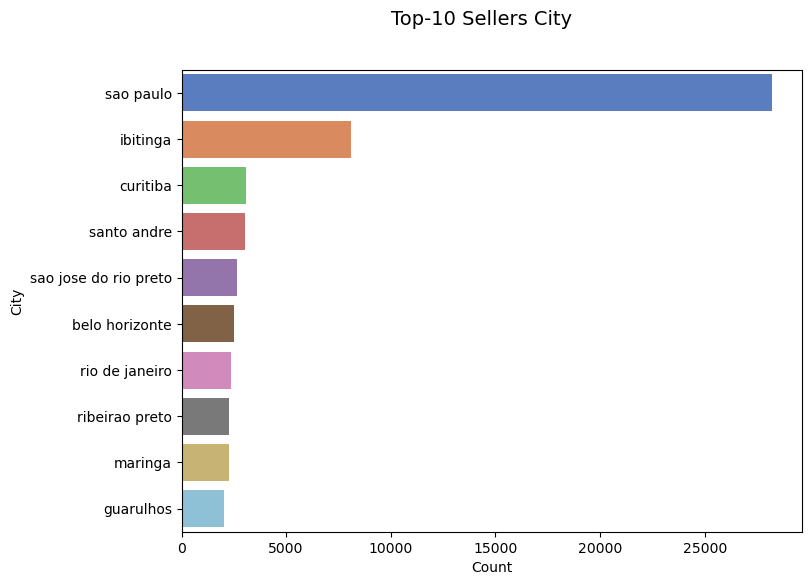

In [16]:
# Plot Top-10 most sellers city

plt.figure(figsize=(8,6))
idx = olist['seller_city'].value_counts()[:10].index
sns.countplot(y=olist['seller_city'], order=idx)
plt.xlabel('Count')
plt.ylabel('City')
plt.suptitle('Top-10 Sellers City', fontsize=14)
plt.show()

**Sao Paulo has the largest number of customers and sellers. The dataset will simply be focused based on Sao Paulo data.**

# Sao Paulo Customers

In [17]:
# Filter dataset to show only Sao Paulo Customers

sao_paulo_customers = olist.query("customer_city == 'sao paulo'")
sao_paulo_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119082,be003b92657e12fe422a450aacc1eed7,ce4cb710ba906b8b905d1f9451f7797d,delivered,2018-08-05 21:20:52,2018-08-05 21:30:18,2018-08-06 13:13:00,2018-08-09 22:11:30,2018-08-17 00:00:00,1.0,8dcbe1c268314dc0f6df3ca28b5b43ee,...,16.0,5.0,11.0,91a135708ad7c21c2675069c33a98670,3572,sao paulo,SP,24445.0,sao goncalo,RJ
119089,c1377e7b1831c006b3739d06c303ea69,661a16885133c408f70a39abb26123f4,delivered,2018-04-21 22:27:34,2018-04-24 19:18:16,2018-04-23 19:11:08,2018-04-27 21:12:21,2018-05-17 00:00:00,1.0,3c3c58dae0e49e5d2cc6c35680dd347a,...,55.0,8.0,18.0,d3221bfeac032294b059edb05090bafb,4115,sao paulo,SP,95800.0,venancio aires,RS
119105,1b18059100e6796d8551306a1876fc09,0c7ba0b11923d9c8bad61bfdcd6b3b2b,delivered,2018-08-13 12:22:49,2018-08-13 12:35:10,2018-08-15 11:30:00,2018-08-16 18:38:40,2018-08-20 00:00:00,1.0,20545c8a1fb497b7e692794159e7afdb,...,16.0,8.0,14.0,34b0cd95480e55c2a701293a2b9671b3,5171,sao paulo,SP,2316.0,sao paulo,SP
119110,c31010ef2672e6bae06cf6e265b98138,aa8fe6fdddb25648793aab5b07e5f73d,delivered,2017-02-17 03:09:22,2017-02-17 03:15:08,2017-02-17 07:29:02,2017-02-20 14:44:16,2017-03-23 00:00:00,1.0,5f348c2c79eb5d1eea867e7903fce1ee,...,67.0,14.0,28.0,677b375226f001908487de4d5055a3a6,2139,sao paulo,SP,95055.0,caxias do sul,SP


In [18]:
# Set pandas max columns and rows

pd.set_option('display.max_columns', len(sao_paulo_customers.columns)) 
pd.set_option('display.max_rows', 100)

## Sao Paulo review score

In [19]:
# Count overall review score

sao_paulo_customers['review_score'].value_counts()

5.0    10762
4.0     3420
1.0     1700
3.0     1454
2.0      536
Name: review_score, dtype: int64

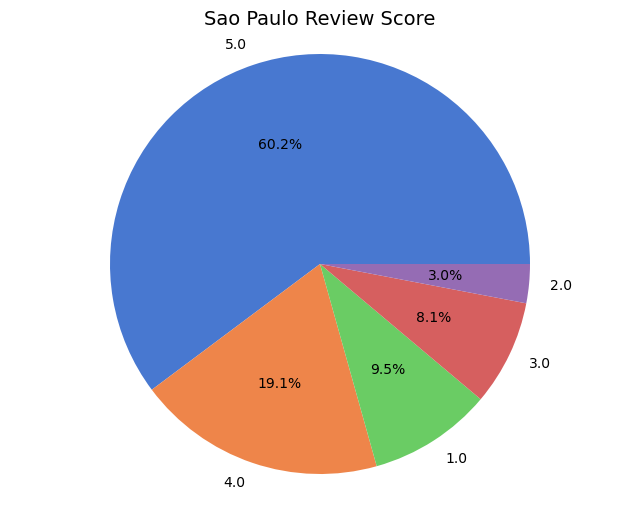

In [20]:
# Plot pie cart Review Score submitted by Sao Paulo customers

sp_review_score_counts = sao_paulo_customers['review_score'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
plt.pie(sp_review_score_counts, labels=sp_review_score_counts.index, autopct='%.1f%%')
plt.axis('equal')
plt.title('Sao Paulo Review Score', fontsize=14)
plt.show()

**The graph shows that the overall review score from Sao Paulo customers to their purchased product was good. Over 60% gave 5 point and the lowest point, which is 1, accumulated about 9%.**

## Most popular product categories purchased by customers from Sao Paulo

In [21]:
# Extract popular product categories purchased by Sao Paulo customers

popular_products = sao_paulo_customers['product_category_name'].value_counts()
popular_products

bed_bath_table                                   2142
health_beauty                                    1757
sports_leisure                                   1421
housewares                                       1358
furniture_decor                                  1324
computers_accessories                            1228
watches_gifts                                     842
toys                                              658
telephony                                         632
auto                                              554
perfumery                                         548
baby                                              493
garden_tools                                      479
cool_stuff                                        455
stationery                                        377
electronics                                       355
fashion_bags_accessories                          324
pet_shop                                          314
office_furniture            

In [63]:
len(sao_paulo_customers['product_category_name'].unique())

71

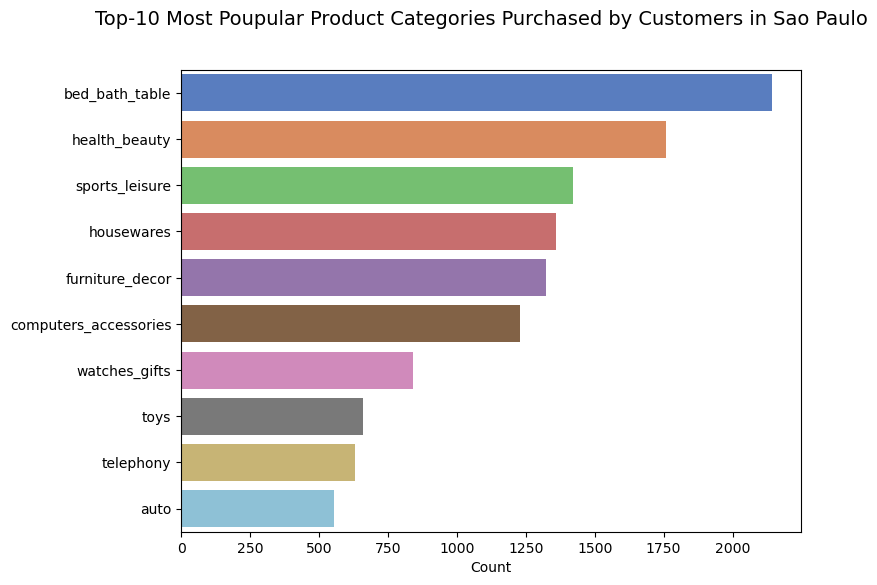

In [22]:
# Plot Top-10 most popular product categories purchased by Sao Paulo customers

plt.figure(figsize=(8,6))
idx = popular_products[:10].index
sns.countplot(y=sao_paulo_customers['product_category_name'], order=idx)
plt.xlabel('Count')
plt.ylabel('')
plt.suptitle("Top-10 Most Poupular Product Categories Purchased by Customers in Sao Paulo", fontsize=14)
plt.show()

**The figure shows that Sao Paulo's customers liked to buy bed-bath-table products with more than 2000 transactions. The second top list was health-beauty with about 1750 transactions, and so on.**.

**Now, let's see the review score for each top 10 product categories.**

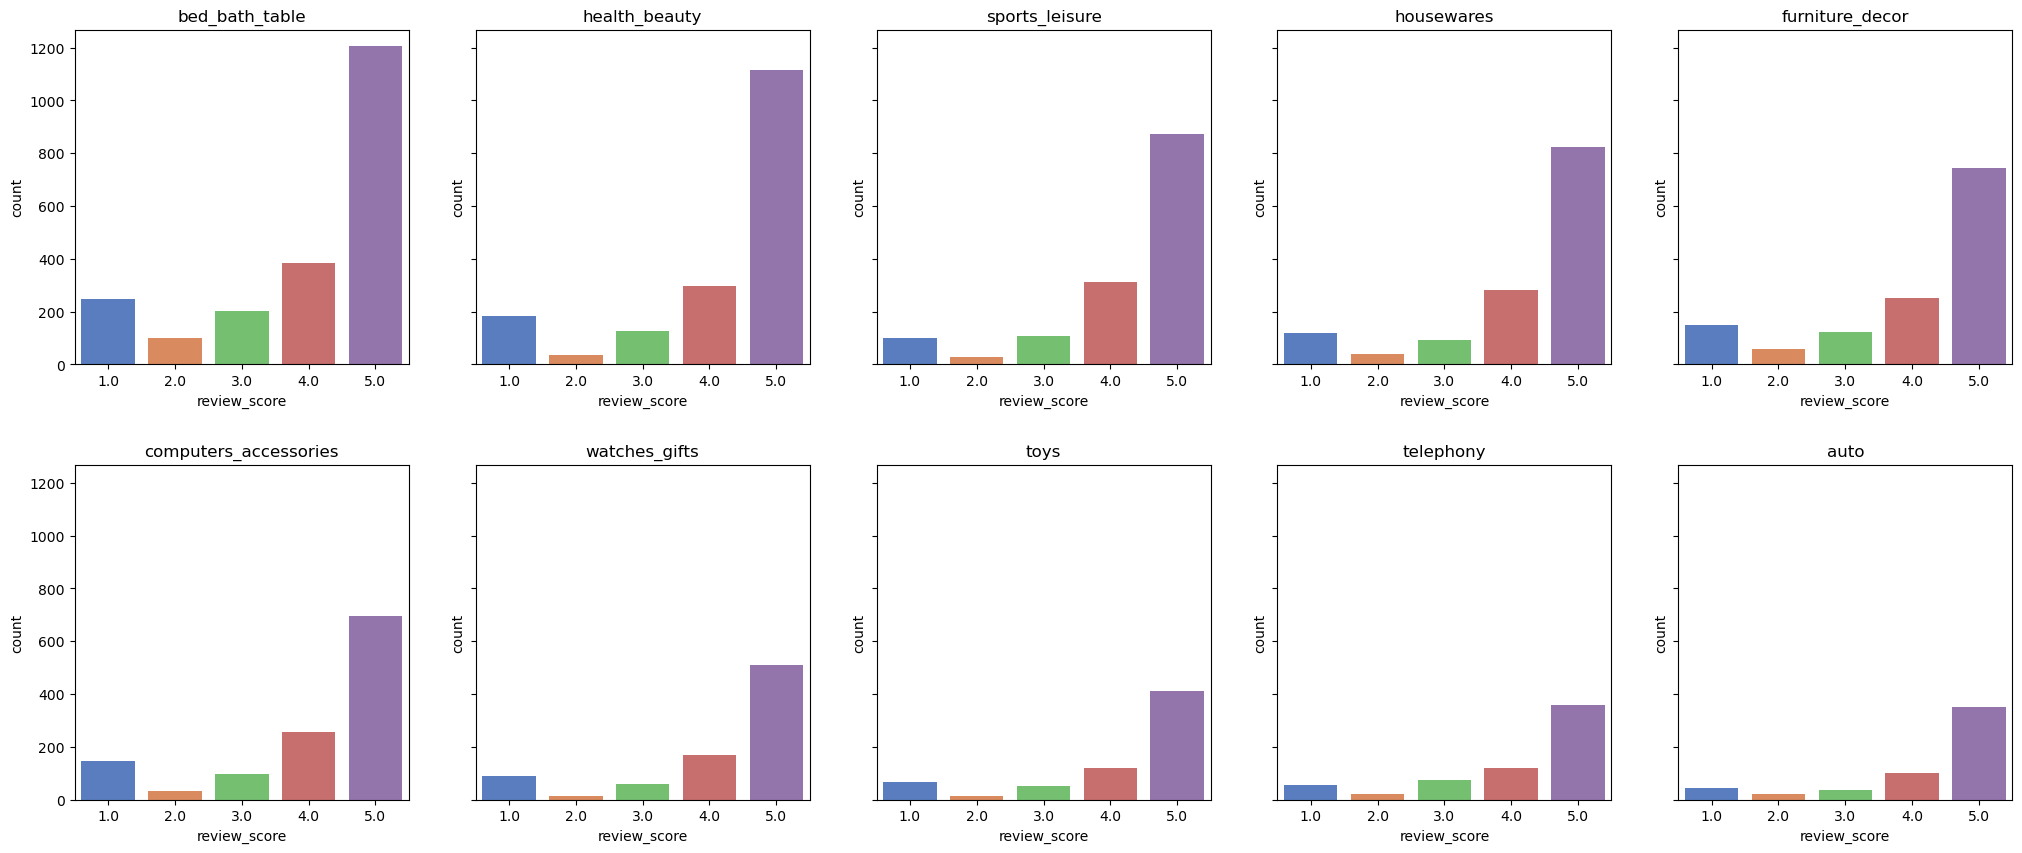

In [23]:
# Plot a bar chart displaying the review score of the top-10 list

# Create a list consisting top-10 popular product category names
top10_popular_list = list(idx)

# Setting up figures
fig, axs = plt.subplots(2,5, figsize=(25, 10), facecolor='w', edgecolor='k', sharey=True)
fig.subplots_adjust(hspace=.3, wspace=.2)
axs = axs.ravel() # For re-shaping array


# Iterate thorough top-10 popular product list
for idx, i in enumerate(top10_popular_list):
    data1 = sao_paulo_customers.query(f"product_category_name == '{i}'")
    axs[idx].set_title(i)
    sns.countplot(x='review_score', data=data1, ax=axs[idx])

plt.show()

**Indeed, bed-bath-table has significantly high review score than others. But overall, 5 point was dominant among top 10 popular product purchased by Sao Paulo's customers.**

## Highest total price share of product categories purchased by customers from Sao Paulo

In [24]:
product_total_price = sao_paulo_customers.groupby('product_category_name').price.sum().sort_values(ascending=False)
product_total_price_share = (product_total_price / sum(product_total_price))*100
product_total_price_share[:10]

product_category_name
health_beauty            9.886344
bed_bath_table           9.347950
watches_gifts            8.637925
sports_leisure           7.796223
computers_accessories    7.401557
housewares               5.691255
furniture_decor          5.396950
cool_stuff               3.591452
toys                     3.591435
perfumery                3.187462
Name: price, dtype: float64

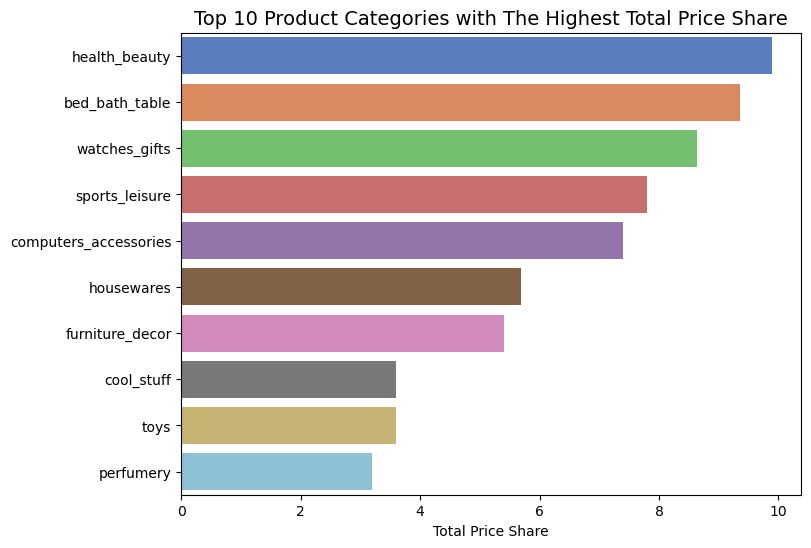

In [25]:
top10_total_share = product_total_price_share[:10]
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=top10_total_share.values, y=top10_total_share.index)
ax.set_title('Top 10 Product Categories with The Highest Total Price Share', fontsize=14)
ax.set_ylabel('')
ax.set_xlabel('Total Price Share', fontsize=10)
plt.show()

**Although health-beauty was second on the list of popular product categories among Sao Paulo shoppers, it was at the top of the list in terms of total price share.**

In [26]:
top10_total_share_list = list(top10_total_share[:10].index)
top10_total_share_list

['health_beauty',
 'bed_bath_table',
 'watches_gifts',
 'sports_leisure',
 'computers_accessories',
 'housewares',
 'furniture_decor',
 'cool_stuff',
 'toys',
 'perfumery']

In [27]:
top10_popular_list

['bed_bath_table',
 'health_beauty',
 'sports_leisure',
 'housewares',
 'furniture_decor',
 'computers_accessories',
 'watches_gifts',
 'toys',
 'telephony',
 'auto']

In [28]:
intersection = set(top10_popular_list).intersection(top10_total_share_list)
print(intersection)

{'bed_bath_table', 'housewares', 'toys', 'furniture_decor', 'watches_gifts', 'health_beauty', 'sports_leisure', 'computers_accessories'}


In [29]:
union = set(top10_popular_list).union(top10_total_share_list)
reverse_intersection = union - intersection
print(reverse_intersection)


{'telephony', 'cool_stuff', 'auto', 'perfumery'}


**Cool-stuff and perfumery were in the top 10 of the total price share list, but were not in the top 10 of the popular product categories. The same was true for auto and telephones, which were in the top 10 popular product categories but not in the top 10 total share list.**

## Most used payment type of Sao Paulo Customers

In [30]:
# Count the most used payment type

sao_paulo_customers['payment_type'].value_counts()

credit_card    13419
boleto          3149
voucher          983
debit_card       321
Name: payment_type, dtype: int64

In [64]:
sao_paulo_customers['payment_type'].unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card'], dtype=object)

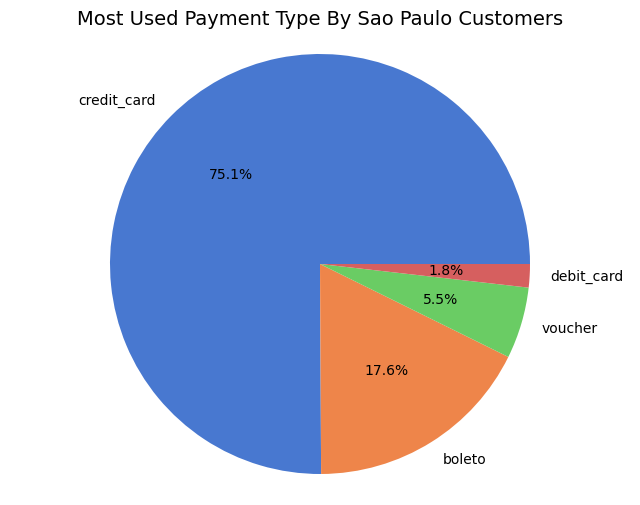

In [31]:
# Plot the most used payment type among Sao Paulo

sp_payment_type_counts = sao_paulo_customers['payment_type'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
plt.pie(sp_payment_type_counts, labels=sp_payment_type_counts.index, autopct='%.1f%%')
plt.axis('equal')
plt.title('Most Used Payment Type By Sao Paulo Customers', fontsize=14)
plt.show()

**Among Sao Paulo's customers, the credit card became the most used payment method.**

## Days and time when many customers placed orders

In [32]:
# Check data type for each column

sao_paulo_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17872 entries, 0 to 119117
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       17872 non-null  object 
 1   customer_id                    17872 non-null  object 
 2   order_status                   17872 non-null  object 
 3   order_purchase_timestamp       17872 non-null  object 
 4   order_approved_at              17872 non-null  object 
 5   order_delivered_carrier_date   17872 non-null  object 
 6   order_delivered_customer_date  17872 non-null  object 
 7   order_estimated_delivery_date  17872 non-null  object 
 8   order_item_id                  17872 non-null  float64
 9   product_id                     17872 non-null  object 
 10  seller_id                      17872 non-null  object 
 11  shipping_limit_date            17872 non-null  object 
 12  price                          17872 non-null

In [33]:
# Convert corresponding columns to datetime format

sao_paulo_customers['order_approved_at'] = pd.to_datetime(sao_paulo_customers['order_approved_at'])
sao_paulo_customers['order_delivered_carrier_date'] = pd.to_datetime(sao_paulo_customers['order_delivered_carrier_date'])
sao_paulo_customers['order_purchase_timestamp'] = pd.to_datetime(sao_paulo_customers['order_purchase_timestamp'])
sao_paulo_customers['order_delivered_customer_date'] = pd.to_datetime(sao_paulo_customers['order_delivered_customer_date'])
sao_paulo_customers['order_estimated_delivery_date'] = pd.to_datetime(sao_paulo_customers['order_estimated_delivery_date'])

In [34]:
# Make a function to categorize time purchase

def time_period(x):
    if x>=5 and x<12: # from 5:00 to 11:59
        return "Morning"
    elif x>=12 and x<17: # from 12:00 to 16:59
        return "Afternoon"
    elif x>=17 and x<21: # from 17:00 to 20:59
        return "Evening"
    else:
        return "Night" # start from 21:00

# Create corresponding columns for placing order purchase timestamps

sao_paulo_customers = sao_paulo_customers.assign(
    purchase_date = pd.to_datetime(sao_paulo_customers['order_purchase_timestamp']).dt.date,
    purchase_year = pd.to_datetime(sao_paulo_customers['order_purchase_timestamp']).dt.year,
    purchase_month = pd.to_datetime(sao_paulo_customers['order_purchase_timestamp']).dt.month,
    purchase_MMYY= pd.to_datetime(sao_paulo_customers['order_purchase_timestamp']).dt.strftime('%b-%y'),
    purchase_day = pd.to_datetime(sao_paulo_customers['order_purchase_timestamp']).dt.day_name(),
    purchase_hour = pd.to_datetime(sao_paulo_customers['order_purchase_timestamp']).dt.hour)

sao_paulo_customers['purchase_time']= sao_paulo_customers['purchase_hour'].apply(time_period)

sao_paulo_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,purchase_date,purchase_year,purchase_month,purchase_MMYY,purchase_day,purchase_hour,purchase_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,2017-10-02,2017,10,Oct-17,Monday,10,Morning
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,2017-10-02,2017,10,Oct-17,Monday,10,Morning
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,2017-10-02,2017,10,Oct-17,Monday,10,Morning
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,1.0,credit_card,...,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP,2017-08-15,2017,8,Aug-17,Tuesday,18,Evening
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,1.0,credit_card,...,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP,2017-08-02,2017,8,Aug-17,Wednesday,18,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119082,be003b92657e12fe422a450aacc1eed7,ce4cb710ba906b8b905d1f9451f7797d,delivered,2018-08-05 21:20:52,2018-08-05 21:30:18,2018-08-06 13:13:00,2018-08-09 22:11:30,2018-08-17,1.0,8dcbe1c268314dc0f6df3ca28b5b43ee,4a5b36211b1f51bf7eaa5c10a57fa483,2018-08-09 21:30:18,139.19,16.07,1.0,credit_card,...,5.0,11.0,91a135708ad7c21c2675069c33a98670,3572,sao paulo,SP,24445.0,sao goncalo,RJ,2018-08-05,2018,8,Aug-18,Sunday,21,Night
119089,c1377e7b1831c006b3739d06c303ea69,661a16885133c408f70a39abb26123f4,delivered,2018-04-21 22:27:34,2018-04-24 19:18:16,2018-04-23 19:11:08,2018-04-27 21:12:21,2018-05-17,1.0,3c3c58dae0e49e5d2cc6c35680dd347a,b5bb2b985208834bd5bd86c7a402bbad,2018-04-26 23:31:01,310.53,20.05,1.0,credit_card,...,8.0,18.0,d3221bfeac032294b059edb05090bafb,4115,sao paulo,SP,95800.0,venancio aires,RS,2018-04-21,2018,4,Apr-18,Saturday,22,Night
119105,1b18059100e6796d8551306a1876fc09,0c7ba0b11923d9c8bad61bfdcd6b3b2b,delivered,2018-08-13 12:22:49,2018-08-13 12:35:10,2018-08-15 11:30:00,2018-08-16 18:38:40,2018-08-20,1.0,20545c8a1fb497b7e692794159e7afdb,b5f0712d22a873b6797ab6cc65c3fcba,2018-08-17 12:35:10,12.99,8.29,1.0,credit_card,...,8.0,14.0,34b0cd95480e55c2a701293a2b9671b3,5171,sao paulo,SP,2316.0,sao paulo,SP,2018-08-13,2018,8,Aug-18,Monday,12,Afternoon
119110,c31010ef2672e6bae06

In [65]:
sao_paulo_customers['order_purchase_timestamp'].min()

Timestamp('2016-10-03 09:44:50')

In [66]:
sao_paulo_customers['order_purchase_timestamp'].max()

Timestamp('2018-08-29 12:25:59')

In [67]:
# Create pivot table showing days and time purchases

orders_time_days = sao_paulo_customers.pivot_table(values='order_id', columns='purchase_day', index='purchase_time', aggfunc='count')
orders_time_days

purchase_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
purchase_time,,,,,,,
Afternoon,866,983,585,661,965,951,1026
Evening,520,663,435,622,584,750,623
Morning,589,688,353,320,689,688,628
Night,495,567,423,575,484,620,519


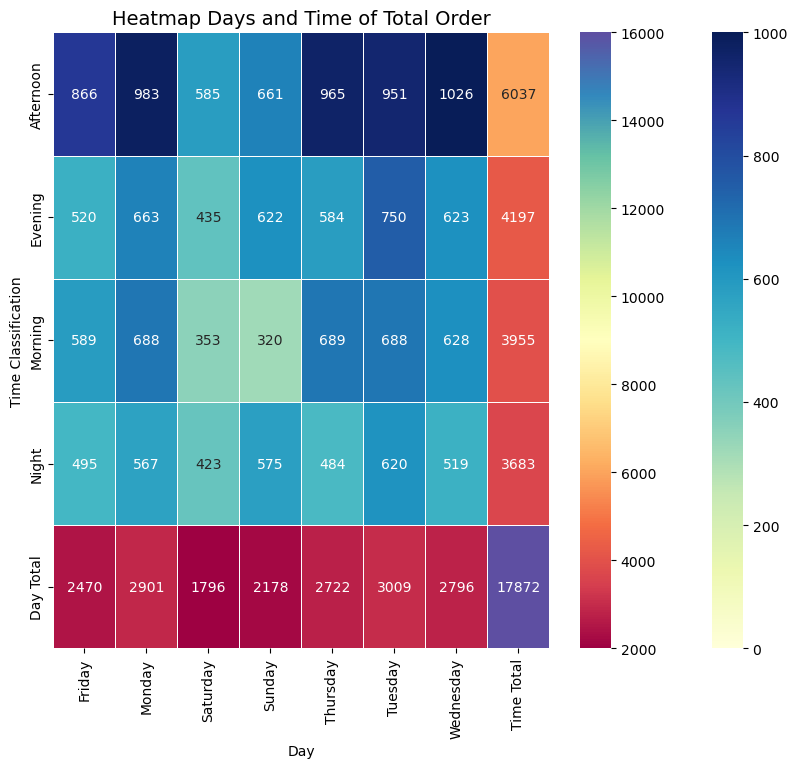

In [68]:
# Plot heatmap showing the numbers above alongside with the total

orders_time_days['Time Total'] = orders_time_days.sum(axis=1)
orders_time_days.loc['Day Total'] = orders_time_days.sum(axis=0)

df_values = orders_time_days.copy()
df_values['Time Total'] = float('nan')
df_values.loc['Day Total'] = float('nan')

df_total = orders_time_days.copy()
df_total.loc[:-1, :-1] = float('nan')

fig, ax = plt.subplots(figsize=((10,8)))
sns.heatmap(ax=ax, data=df_values, annot=True, fmt='.0f', cmap='YlGnBu', vmin=0, vmax=1000, linewidth=.5)
sns.heatmap(ax=ax, data=df_total, annot=True, fmt='.0f', cmap='Spectral', vmin=2000, vmax=16000, linewidth=.5)
ax.set(xlabel='Day', ylabel='Time Classification')
plt.title('Heatmap Days and Time of Total Order', fontsize=14)
plt.show()

**The figure shows that on Wednesday afternoon, there were the most orders, with 1026 transactions by customers from Sao Paulo. In contrast, the least orders occurred on Sunday morning, with a total of only 320 transactions. But, in terms of days, Tuesday ranked first among others.**

**Let's see what are the top 10 product categories were ordered on Wednesday afternoon.**

In [37]:
# Extract product category proportions on Wednesday afternoon

(sao_paulo_customers.query("purchase_day == 'Wednesday' & purchase_time == 'Afternoon'")
.groupby(['product_category_name']).order_id.count()).sort_values(ascending=False)[:10]

norm = (sao_paulo_customers.query("purchase_day == 'Wednesday' & purchase_time == 'Afternoon'")
.groupby(['product_category_name']).order_id.count()).sort_values(ascending=False)[:10] / (sao_paulo_customers.query("purchase_day == 'Wednesday' & purchase_time == 'Afternoon'")
.groupby(['product_category_name']).order_id.count()).sort_values(ascending=False).sum()
norm

product_category_name
bed_bath_table           0.139376
health_beauty            0.096491
sports_leisure           0.084795
computers_accessories    0.075049
housewares               0.068226
furniture_decor          0.067251
watches_gifts            0.044834
auto                     0.036062
toys                     0.034113
perfumery                0.033138
Name: order_id, dtype: float64

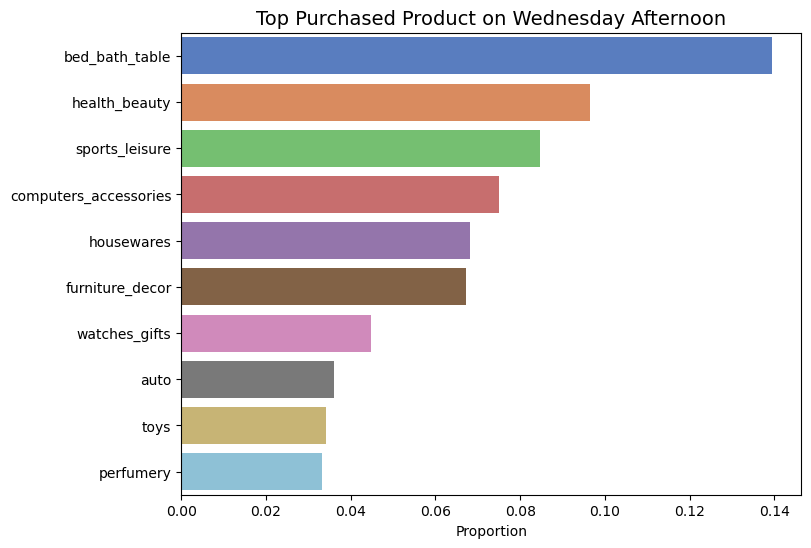

In [38]:
# Plot the proportion of top 10 product categories

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(y=norm.index, x=norm.values)
ax.set_title('Top Purchased Product on Wednesday Afternoon', fontsize=14)
ax.set_ylabel('')
ax.set_xlabel('Proportion', fontsize=10)
plt.show()

**As it turns out, bed-bath-table ranked first as the most ordered product on Wednesday afternoon, followed by health-beauty and sport-leisure.**

**Then, what if we look at the most time and the most days of transactions. Let's find out what product categories was the winner.**

In [39]:
grouped_time = sao_paulo_customers.groupby('purchase_time')['product_category_name'].value_counts()
grouped_times = grouped_time['Afternoon'][:5]
grouped_times

product_category_name
bed_bath_table           704
health_beauty            604
housewares               497
computers_accessories    484
sports_leisure           484
Name: product_category_name, dtype: int64

In [40]:
grouped_day = sao_paulo_customers.groupby('purchase_day')['product_category_name'].value_counts()
grouped_days = grouped_day['Tuesday'][:5]
grouped_days

product_category_name
bed_bath_table     383
health_beauty      292
housewares         250
furniture_decor    212
sports_leisure     211
Name: product_category_name, dtype: int64

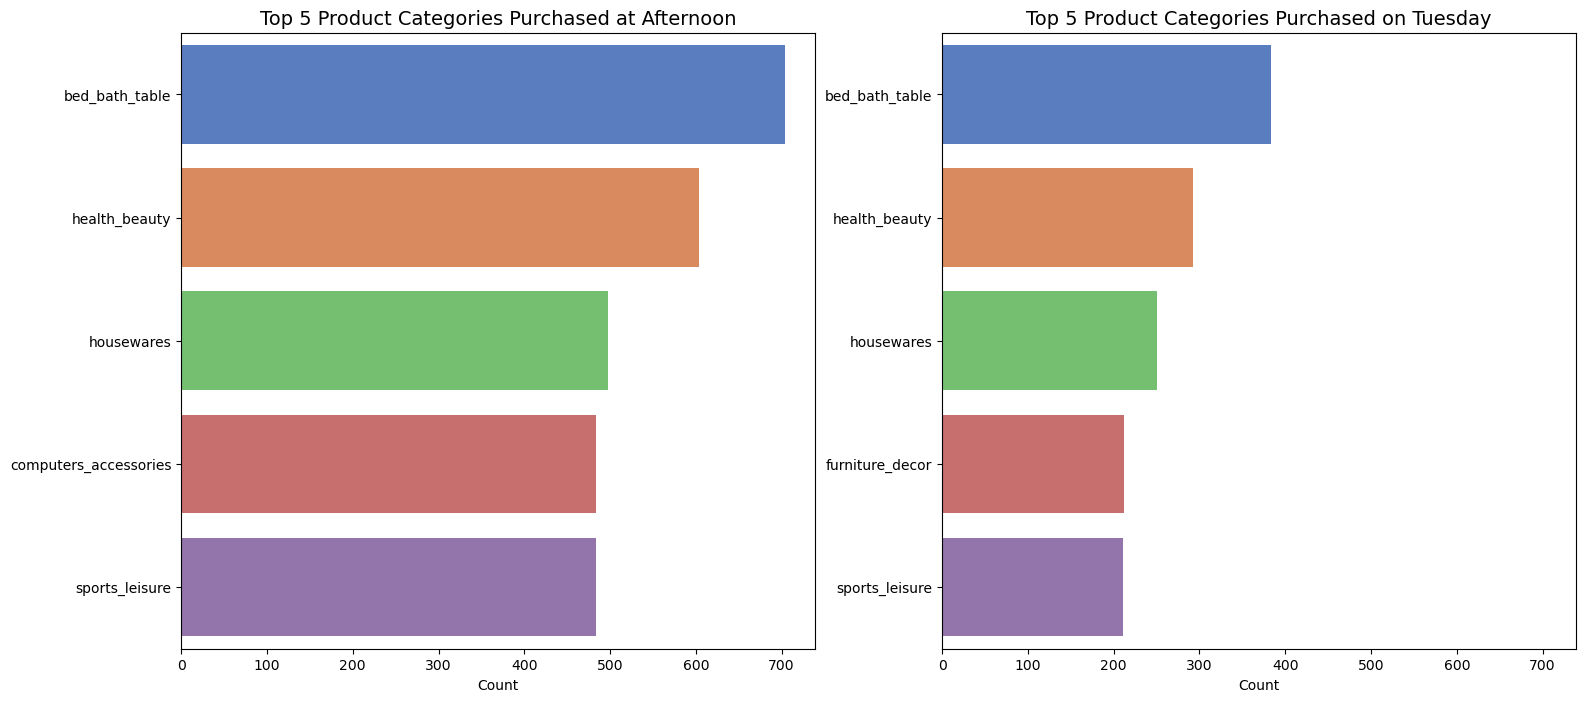

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharex=True)

sns.barplot(x=grouped_times.values, y=grouped_times.index, ax=ax1)
ax1.set_title('Top 5 Product Categories Purchased at Afternoon', fontsize=14)
ax1.set_ylabel('')
ax1.set_xlabel('Count', fontsize=10)

sns.barplot(x=grouped_days.values, y=grouped_days.index, ax=ax2)
ax2.set_title('Top 5 Product Categories Purchased on Tuesday', fontsize=14)
ax2.set_ylabel('')
ax2.set_xlabel('Count', fontsize=10)

plt.show()


**The table above shows that four products (bed-bath-table, health-beauty, housewares, sport-leisure) ranked first, second, third, and fifth at afternoon orders or orders on Tuesdays. Only fourth order was different, which was computer accessories at Afternoon orders and furniture-decor on Tuesday orders.**

## Top product categories by purchase day dan purchase time

**After seeing the most transactions on Wednesday afternoon, now let's see what products are most frequently ordered on each days and time.**

### Purchase day

In [42]:
# Merge all days in week

five_most_product_day = pd.concat(
    [grouped_day['Monday'][:5], 
    grouped_day['Tuesday'][:5], 
    grouped_day['Wednesday'][:5], 
    grouped_day['Thursday'][:5], 
    grouped_day['Friday'][:5], 
    grouped_day['Saturday'][:5],
    grouped_day['Sunday'][:5]],
    keys=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
five_most_product_day

           product_category_name
Monday     bed_bath_table           309
           health_beauty            250
           sports_leisure           242
           furniture_decor          238
           housewares               230
Tuesday    bed_bath_table           383
           health_beauty            292
           housewares               250
           furniture_decor          212
           sports_leisure           211
Wednesday  bed_bath_table           355
           health_beauty            292
           sports_leisure           227
           housewares               203
           computers_accessories    191
Thursday   bed_bath_table           316
           health_beauty            287
           sports_leisure           222
           furniture_decor          220
           computers_accessories    218
Friday     bed_bath_table           287
           health_beauty            242
           furniture_decor          202
           sports_leisure           186
       

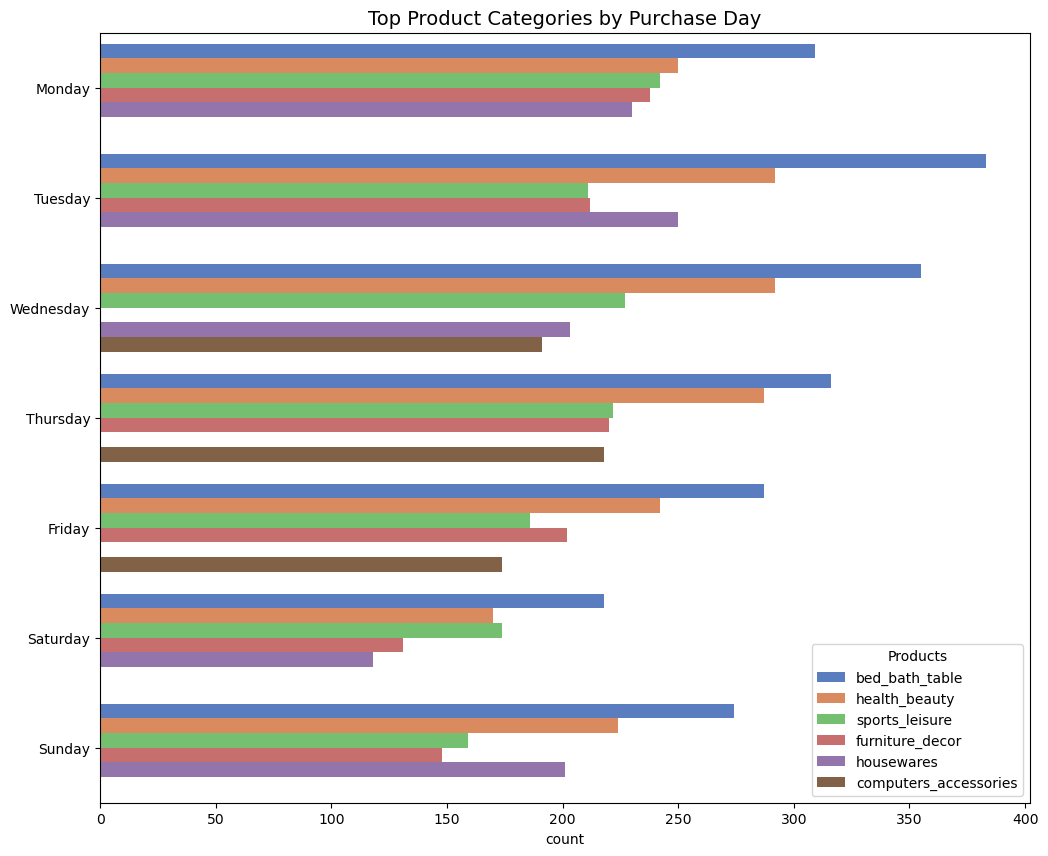

In [43]:
# Convert it into single dataframe

five_most_product_day_df = pd.DataFrame({
    'product_category_name': five_most_product_day.index.get_level_values(1),
    'purchase_time': five_most_product_day.index.get_level_values(0),
    'count': five_most_product_day.values
})

# Plotting

fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x='count', hue='product_category_name', y='purchase_time', data=five_most_product_day_df)
plt.legend(loc='lower right', title='Products')
plt.title('Top Product Categories by Purchase Day', fontsize=14)
plt.ylabel('')
plt.show()

**Apperently bed-bath-table has always ranked first in the daily transactions of customers from Sao Paulo. Another interesting point is that, on Saturday, sport-leisure became the second product purchased by customers after bed-bath-table.**

**By seeing this, it's recommend holding a sport-leisure flash sale on Saturday to attract more customers to make transactions.**

### Purchase time

In [44]:
# Merge all time in a day

five_most_product_time = pd.concat(
    [grouped_time['Morning'][:5], 
    grouped_time['Evening'][:5], 
    grouped_time['Night'][:5], 
    grouped_time['Afternoon'][:5]], 
    keys=['Morning', 'Evening', 'Night', 'Afternoon'])
five_most_product_time

           product_category_name
Morning    bed_bath_table           435
           health_beauty            377
           sports_leisure           339
           computers_accessories    302
           housewares               301
Evening    bed_bath_table           541
           health_beauty            432
           housewares               342
           furniture_decor          304
           sports_leisure           287
Night      bed_bath_table           462
           health_beauty            344
           furniture_decor          336
           sports_leisure           311
           housewares               218
Afternoon  bed_bath_table           704
           health_beauty            604
           housewares               497
           computers_accessories    484
           sports_leisure           484
Name: product_category_name, dtype: int64

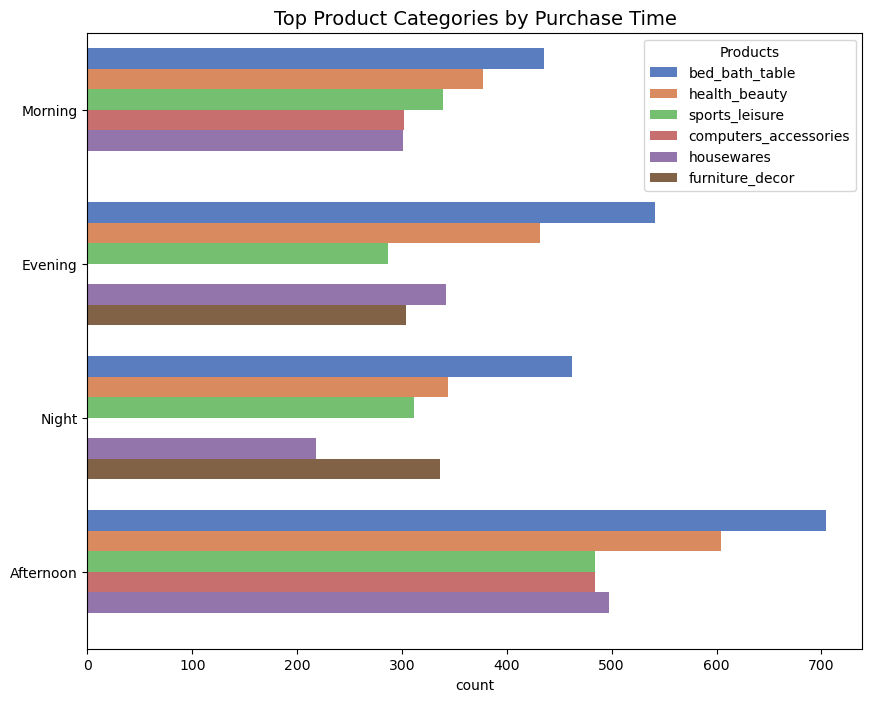

In [45]:
# Convert it into single dataframe

five_most_product_time_df = pd.DataFrame({
    'product_category_name': five_most_product_time.index.get_level_values(1),
    'purchase_time': five_most_product_time.index.get_level_values(0),
    'count': five_most_product_time.values
})

# Plotting

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='count', hue='product_category_name', y='purchase_time', data=five_most_product_time_df)
plt.legend(loc='upper right', title='Products')
plt.title('Top Product Categories by Purchase Time', fontsize=14)
plt.ylabel('')
plt.show()


**Again, bed-bath-table ranked first in terms of purchase time. The interesting thing here is that customers placed furniture decor orders in the evening and night; something they didn't do in the morning and afternoon.**

## Timedelta estimated delivery time vs actual delivery time

In [46]:
# Create a new column consist timedelta in hours between estimated delivery time and actual delivery time

sao_paulo_customers['timedelta_delivered_vs_estimated_hours'] = ((sao_paulo_customers['order_estimated_delivery_date'] - 
                                                            sao_paulo_customers['order_delivered_customer_date']).dt.total_seconds() / 3600)
sao_paulo_customers[['order_id', 'product_category_name', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'timedelta_delivered_vs_estimated_hours']]

,order_id,product_category_name,order_delivered_customer_date,order_estimated_delivery_date,timedelta_delivered_vs_estimated_hours
0,e481f51cbdc54678b7cc49136f2d6af7,housewares,2017-10-10 21:25:13,2017-10-18,170.579722
1,e481f51cbdc54678b7cc49136f2d6af7,housewares,2017-10-10 21:25:13,2017-10-18,170.579722
2,e481f51cbdc54678b7cc49136f2d6af7,housewares,2017-10-10 21:25:13,2017-10-18,170.579722
3,128e10d95713541c87cd1a2e48201934,housewares,2017-08-18 14:44:43,2017-08-28,225.254722
4,0e7e841ddf8f8f2de2bad69267ecfbcf,housewares,2017-08-07 18:30:01,2017-08-15,173.499722
...,...,...,...,...,...
119082,be003b92657e12fe422a450aacc1eed7,auto,2018-08-09 22:11:30,2018-08-17,169.808333
119089,c1377e7b1831c006b3739d06c303ea69,auto,2018-04-27 21:12:21,2018-05-17,458.794167
119105,1b18059100e6796d8551306a1876fc09,food_drink,2018-08-16 18:38:40,2018-08-20,77.355556
119110,c31010ef2672e6bae06cf6e265b98138,small_appliances,2017-02-20 14:44:16,2017-03-23,729.262222


###  Estimated delivery date missed positively

**Which means that the customer has received the product before the estimated date the product arrived.**

In [47]:
timedelta_morethan_24hrs = (sao_paulo_customers[sao_paulo_customers['timedelta_delivered_vs_estimated_hours'] > 24]
                            [['order_id', 'product_category_name', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'timedelta_delivered_vs_estimated_hours']])
timedelta_morethan_24hrs

,order_id,product_category_name,order_delivered_customer_date,order_estimated_delivery_date,timedelta_delivered_vs_estimated_hours
0,e481f51cbdc54678b7cc49136f2d6af7,housewares,2017-10-10 21:25:13,2017-10-18,170.579722
1,e481f51cbdc54678b7cc49136f2d6af7,housewares,2017-10-10 21:25:13,2017-10-18,170.579722
2,e481f51cbdc54678b7cc49136f2d6af7,housewares,2017-10-10 21:25:13,2017-10-18,170.579722
3,128e10d95713541c87cd1a2e48201934,housewares,2017-08-18 14:44:43,2017-08-28,225.254722
4,0e7e841ddf8f8f2de2bad69267ecfbcf,housewares,2017-08-07 18:30:01,2017-08-15,173.499722
...,...,...,...,...,...
119082,be003b92657e12fe422a450aacc1eed7,auto,2018-08-09 22:11:30,2018-08-17,169.808333
119089,c1377e7b1831c006b3739d06c303ea69,auto,2018-04-27 21:12:21,2018-05-17,458.794167
119105,1b18059100e6796d8551306a1876fc09,food_drink,2018-08-16 18:38:40,2018-08-20,77.355556
119110,c31010ef2672e6bae06cf6e265b98138,small_appliances,2017-02-20 14:44:16,2017-03-23,729.262222


In [48]:
timedelta_morethan_24hrs.describe()

,timedelta_delivered_vs_estimated_hours
count,16455.000000
mean,274.769382
std,153.328924
min,24.017500
25%,169.570278
50%,251.467500
75%,346.466944
max,1736.132778


In [49]:
# Categorize timedelta to have better understanding

bins= [0, 72, 120, 168, 240, 1500]
labels = [
         'less than 3 days',
         '3 to 5 days',
         '5 to 7 days',
         '7 to 10 days',
         'more than 10 days'
         ]

timedelta_morethan_24hrs['timedelta_day_class_ahead'] = pd.cut(
   timedelta_morethan_24hrs['timedelta_delivered_vs_estimated_hours'], 
   bins=bins, 
   labels=labels,
   include_lowest=False
   )

timedelta_day_class_ahead_count = timedelta_morethan_24hrs.groupby('timedelta_day_class_ahead').order_id.count()

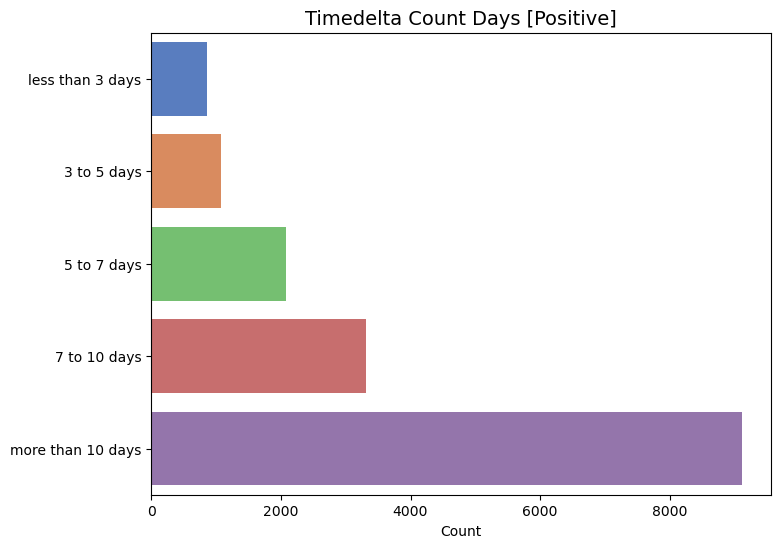

In [60]:
# Plot the timedelta based on bins

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=timedelta_day_class_ahead_count.values, y=timedelta_day_class_ahead_count.index, orient='h')
ax.set_title('Timedelta Count Days [Positive]', fontsize=14)
ax.set_ylabel('')
ax.set_xlabel('Count', fontsize=10)
plt.show()

**From this figure, the estimated delivery time which is ahead more than 10 days from actual delivered to customer almost 9000 times. It means, although it was good for customers because they do not have to wait, but from professional point of view, it was not good enough.**

### Estimated delivery date missed negatively

In [51]:
# Now look for estimated delivery is behind the actual delivery to customers
# Which mean the customer have to wait more days than they informed

timedelta_lessthan_24hrs = (sao_paulo_customers[sao_paulo_customers['timedelta_delivered_vs_estimated_hours'] < -24]
                            [['order_id', 'product_category_name', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'timedelta_delivered_vs_estimated_hours' ]])
timedelta_lessthan_24hrs

,order_id,product_category_name,order_delivered_customer_date,order_estimated_delivery_date,timedelta_delivered_vs_estimated_hours
271,10680478e22d29ed34e872b89144ccda,perfumery,2018-06-01 17:42:07,2018-05-30,-65.701944
436,1b8dc892aec525e5b60529c26eab5a95,watches_gifts,2018-04-03 00:28:52,2018-03-29,-120.481111
475,aa0ada08c461e7c8b384d1e311d474f4,watches_gifts,2018-04-03 23:04:04,2018-03-19,-383.067778
610,a7ccc4df2d363b2ba9037d1ef834a250,watches_gifts,2018-03-23 03:35:02,2018-03-12,-267.583889
780,c429654419aacfe84ec52dd4c45f064d,watches_gifts,2018-06-25 21:14:37,2018-06-06,-477.243611
...,...,...,...,...,...
118288,b81a6b90b7a473ecb855ee9f4a881032,books_technical,2018-08-21 02:56:20,2018-08-16,-122.938889
118617,1cb38ae65fed9fa76684ac28035d4350,consoles_games,2018-04-09 17:32:12,2018-04-04,-137.536667
118618,1cb38ae65fed9fa76684ac28035d4350,consoles_games,2018-04-09 17:32:12,2018-04-04,-137.536667
118929,e039f5e97da2cafaa001b4be0efa36ea,garden_tools,2018-01-04 16:58:51,2017-12-18,-424.980833


In [52]:
timedelta_lessthan_24hrs.describe()

,timedelta_delivered_vs_estimated_hours
count,810.000000
mean,-190.445210
std,238.608036
min,-2321.248611
25%,-213.850556
50%,-119.895278
75%,-66.330347
max,-24.213611


In [53]:
# Categorize timedelta to have better understanding

bins= [-1500, -240, -168, -120, -72, 0]
labels = [
         'more than 10 days',
         '7 to 10 days',
         '5 to 7 days',
         '3 to 5 days',
         'less than 3 days',
         ]

timedelta_lessthan_24hrs['timedelta_day_class_behind'] = pd.cut(
   timedelta_lessthan_24hrs['timedelta_delivered_vs_estimated_hours'], 
   bins=bins, 
   labels=labels,
   include_lowest=False
   )

timedelta_day_class_behind_count = timedelta_lessthan_24hrs.groupby('timedelta_day_class_behind').order_id.count()

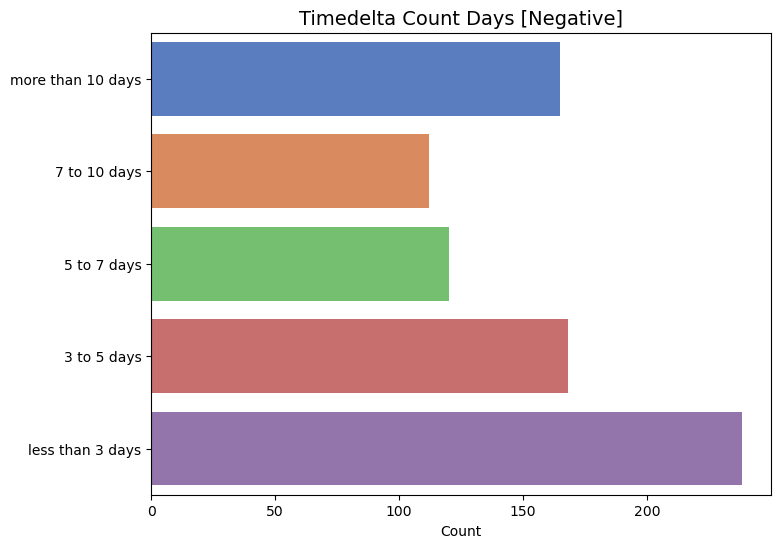

In [61]:
# Plot the timedelta based on bins

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=timedelta_day_class_behind_count.values, y=timedelta_day_class_behind_count.index, orient='h')
ax.set_title('Timedelta Count Days [Negative]', fontsize=14)
ax.set_ylabel('')
ax.set_xlabel('Count', fontsize=10)
plt.show()

**From the figure above, it can be seen that there are 200 times the products are received by the customer not in accordance with the estimated delivery. The customers have to wait longer than what were informed.**

### Timedelta 1 day before the estimated delivery or 1 day after the estimated delivery

**Now, let's see what products that were recieved by the customers which have timedelta plus minus 24 hours.**

In [55]:
# Extract timedelta with less than or equal to 24 and greater than or equal to -24

oneday_offset = (sao_paulo_customers[(sao_paulo_customers['timedelta_delivered_vs_estimated_hours'] >= -24) & (sao_paulo_customers['timedelta_delivered_vs_estimated_hours'] <= 24)]
                [['order_id', 'product_category_name', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'timedelta_delivered_vs_estimated_hours']])
oneday_offset

,order_id,product_category_name,order_delivered_customer_date,order_estimated_delivery_date,timedelta_delivered_vs_estimated_hours
80,23939807bace6dc4e9701a868e697f76,perfumery,2018-08-09 17:36:47,2018-08-10,6.386944
133,1e21fe9a8a7ecfff79a63ddf04761526,perfumery,2018-08-21 00:28:53,2018-08-22,23.518611
831,b973e51d5b8172ede592b1378db59175,watches_gifts,2018-06-05 19:21:45,2018-06-06,4.637500
981,5536d8682e25ee3f39ed444105996fee,watches_gifts,2017-12-11 23:36:57,2017-12-12,0.384167
1117,112d51fc31fb26262d2b28130947b467,watches_gifts,2018-08-23 16:27:59,2018-08-24,7.533611
...,...,...,...,...,...
118441,475c9b166482c7f26c38c7ae858d832a,toys,2018-08-02 17:43:00,2018-08-03,6.283333
118511,f1933830df4ca531d957ee140db7b1c4,pet_shop,2018-08-23 21:59:00,2018-08-24,2.016667
118681,4eeb749b1bc5823fb7ef6af9282ee537,housewares,2018-08-24 21:47:49,2018-08-24,-21.796944
119059,fa0c6595d02f168f7557693dbffa7b69,food,2018-08-30 16:18:46,2018-08-31,7.687222


**In fact, there were only 607 transactions out of a total of 17872 transactions whose products were received by the customer exactly with the estimated delivery time.**

In [56]:
timedelta_summary = {
    'morethan_24hrs' : [len(timedelta_morethan_24hrs)],
    'lessthan_24hrs' : [len(timedelta_lessthan_24hrs)],
    'oneday' : [len(oneday_offset)]
}

timedelta_df = pd.DataFrame(timedelta_summary)
timedelta_df

,morethan_24hrs,lessthan_24hrs,oneday
0,16455,810,607


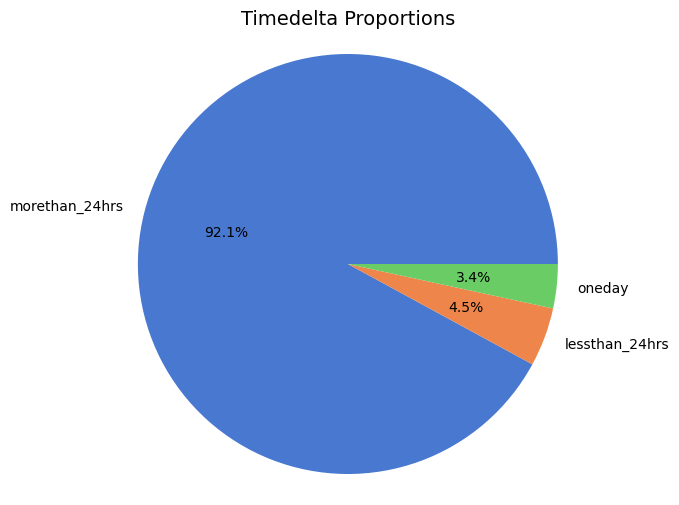

In [57]:
# Plot the most used payment type among Sao Paulo

fig, ax = plt.subplots(figsize=(8, 6))
plt.pie(timedelta_df.sum().values, labels=timedelta_df.sum().index, autopct='%.1f%%')
plt.axis('equal')  # Ensure the pie is drawn as a circle
plt.title('Timedelta Proportions', fontsize=14)
plt.show()



**Olist should be more aware of the late delivery, as this could lead to customer dissatisfaction. The data shows that only 3.4% of the orders were delivered within one day of the estimated delivery time, while 4.5% were delivered later than the estimated delivery time. Olist should strive to accurately estimate delivery times to ensure the best customer experience. Additionally, the company should work on its delivery system, in order to improve customer satisfaction.**